In [1]:
%pip install PyPortfolioOpt
%pip install pandas
%pip install matplotlib

  Using cached pyportfolioopt-1.5.6-py3-none-any.whl.metadata (22 kB)
  Using cached cvxpy-1.8.0-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached ecos-2.0.14-cp311-cp311-win_amd64.whl.metadata (8.2 kB)
  Using cached osqp-1.1.0-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl.metadata (4.9 kB)
Using cached pyportfolioopt-1.5.6-py3-none-any.whl (62 kB)
Using cached ecos-2.0.14-cp311-cp311-win_amd64.whl (72 kB)
Using cached cvxpy-1.8.0-cp311-cp311-win_amd64.whl (1.3 MB)
Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl (887 kB)
Using cached osqp-1.1.0-cp311-cp311-win_amd64.whl (310 kB)

   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   -------- ---

In [2]:
!pip install numpy
!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import plotting , EfficientFrontier
import sys
sys.path.append("..")
from src.task_4 import optimize_portfolio 



In [5]:
df = pd.read_csv('../data/raw/stock_data_cleaned.csv', index_col='Date', parse_dates=True)

In [6]:
my_tsla_forecast = 0.15 
results = optimize_portfolio(df, my_tsla_forecast)

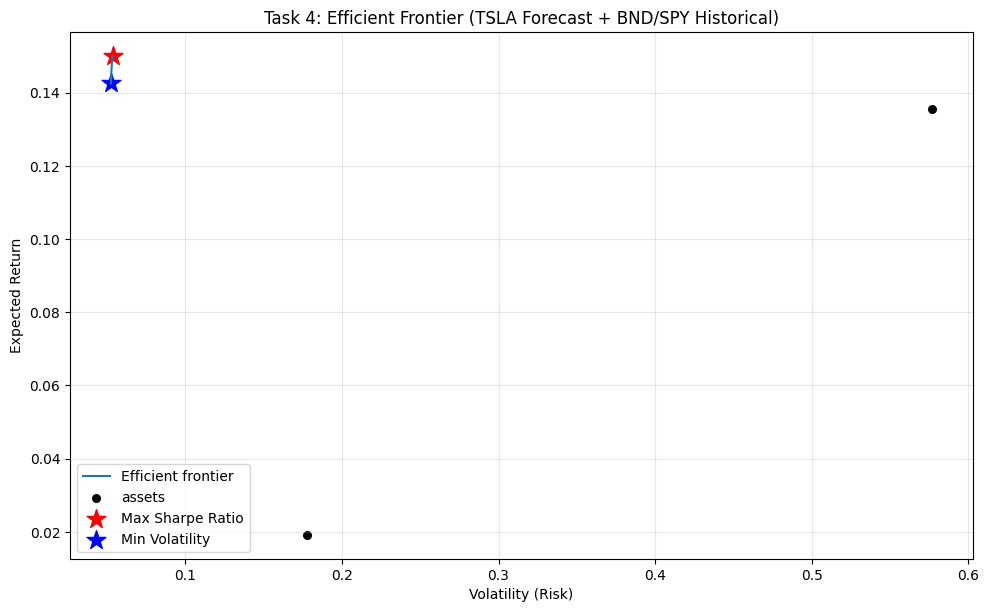

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ef_plot = EfficientFrontier(results['mu'], results['S'])
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)
ax.scatter(results['max_sharpe']['perf'][1], results['max_sharpe']['perf'][0], 
           marker="*", s=200, c="r", label="Max Sharpe Ratio")
ax.scatter(results['min_vol']['perf'][1], results['min_vol']['perf'][0], 
           marker="*", s=200, c="b", label="Min Volatility")

plt.title("Task 4: Efficient Frontier (TSLA Forecast + BND/SPY Historical)")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
ms = results['max_sharpe']
mv = results['min_vol']

print(f"--- MAX SHARPE PORTFOLIO ---")
print(f"Weights: {ms['weights']}")
print(f"Exp. Annual Return: {ms['perf'][0]:.2%}")
print(f"Annual Volatility: {ms['perf'][1]:.2%}")
print(f"Sharpe Ratio: {ms['perf'][2]:.2f}\n")

print(f"--- MIN VOLATILITY PORTFOLIO ---")
print(f"Weights: {mv['weights']}")
print(f"Exp. Annual Return: {mv['perf'][0]:.2%}")
print(f"Annual Volatility: {mv['perf'][1]:.2%}")
print(f"Sharpe Ratio: {mv['perf'][2]:.2f}")

--- MAX SHARPE PORTFOLIO ---
Weights: OrderedDict([('TSLA', 0.9972218628964218), ('BND', 0.0), ('SPY', 0.0027781371035782)])
Exp. Annual Return: 15.00%
Annual Volatility: 5.35%
Sharpe Ratio: 2.80

--- MIN VOLATILITY PORTFOLIO ---
Weights: OrderedDict([('TSLA', 0.9427199128379348), ('BND', 0.0572800871620652), ('SPY', 0.0)])
Exp. Annual Return: 14.25%
Annual Volatility: 5.26%
Sharpe Ratio: 2.71
